In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots
import sys
sys.path.append("../../../src/")
%matplotlib inline

import nanonets
import nanonets_utils

def return_string_topology(N):
    topology = {
        "Nx"                : N,
        "Ny"                : 1,
        "Nz"                : 1,
        "e_pos"             : [[0,0,0],[N-1,0,0]],
        "electrode_type"    : ['constant','floating']
    }
    return topology

def return_network_topology(N):
    topology = {
        "Nx"                : N,
        "Ny"                : N,
        "Nz"                : 1,
        "e_pos"             :  [[0,0,0], [int((N-1)/2),0,0], [N-1,0,0], [0,int((N-1)/2),0], [0,N-1,0], [int((N-1)/2),N-1,0],[N-1,int((N-1)/2),0],[N-1,N-1,0]],
        "electrode_type"    : ['constant','floating','floating','floating','floating','floating','floating','constant']
    }
    return topology

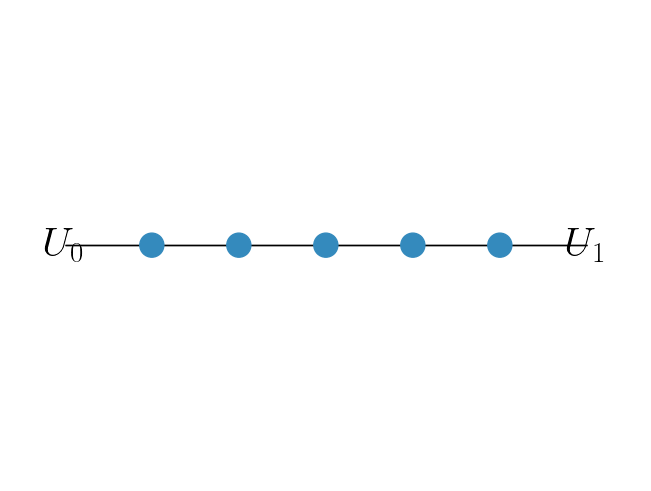

In [6]:
fig         = plt.figure(layout='constrained')
ax          = fig.add_subplot()
topology    = return_string_topology(5)
sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
fig, ax     = nanonets_utils.display_network(sim_class, fig, ax, provide_electrode_labels=[f"$U_{i}$" for i in range(2)], font_size=30)
fig.savefig(f"plots/string_{5}.svg", transparent=True)

# String of Nanoparticles

In [7]:
N_voltages      = 201
N_vals          = np.arange(2,11,1)
voltages        = np.zeros((N_voltages,3))
voltages[:,0]   = np.linspace(-0.2,0.2,N_voltages)
data            = {}

for N in N_vals:

    topology    = return_string_topology(N)
    sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
    sim_class.run_const_voltages(voltages=voltages, target_electrode=1, output_potential=True, save_th=0.1)
    data[N]     = sim_class.return_output_values()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_37844/2422134887.py", line 11, in <module>
    sim_class.run_const_voltages(voltages=voltages, target_electrode=1, output_potential=True, save_th=0.1)
  File "/home/jonasmensing/phd/NanoNets/scripts/1_funding_period/floating_electrode/../../../src/nanonets.py", line 1578, in run_const_voltages
  File "/home/jonasmensing/phd/NanoNets/scripts/1_funding_period/floating_electrode/../../../src/nanonets.py", line 707, in kmc_simulation
  File "/home/jonasmensing/phd/NanoNets/scripts/1_funding_period/floating_electrode/../../../src/nanonets.py", line 339, in select_event
    """Select next charge hopping event and update time by kinetic monte carlo apporach.
    
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  F

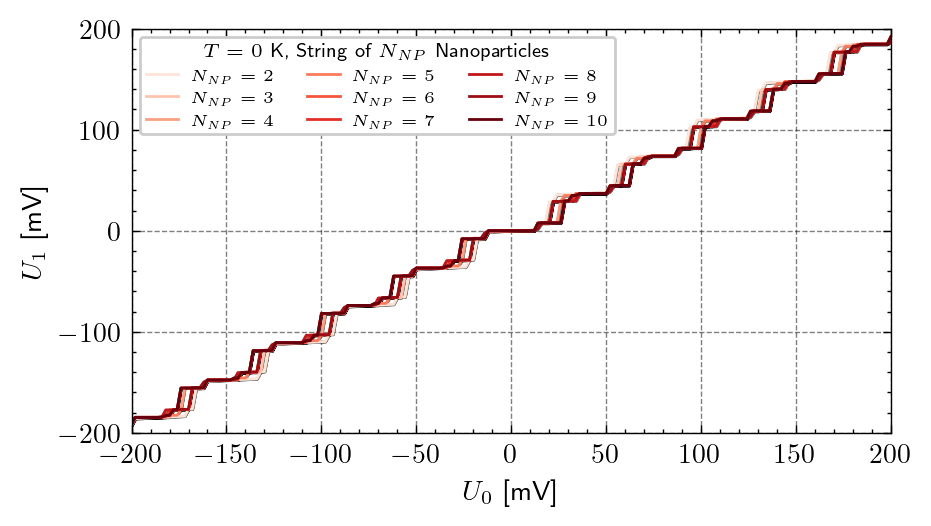

In [ ]:
cmap    = plt.get_cmap('Reds')
N_param = len(N_vals)

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=100)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot()

    for i, N in enumerate(N_vals):

        values  = data[N][:,2]*1000
        error   = data[N][:,3]*1000

        ax.plot(voltages[:,0]*1000, values, color=cmap((i+1)/N_param), label='$N_{NP} ='+f' {N}$')
        ax.fill_between(x=voltages[:,0]*1000, y1=values-error, y2=values+error, color='black', alpha=0.5)

    ax.set_xlim(-200,200)
    ax.set_ylim(-200,200)
    ax.legend(fontsize='xx-small', ncol=3, title='$T = 0$ K, String of $N_{NP}$ Nanoparticles', title_fontsize='x-small')
    ax.set_xlabel("$U_{0}$ [mV]")
    ax.set_ylabel("$U_{1}$ [mV]")

    fig.savefig("plots/constant_string_low_T.svg", transparent=True)

## variable Capacitance

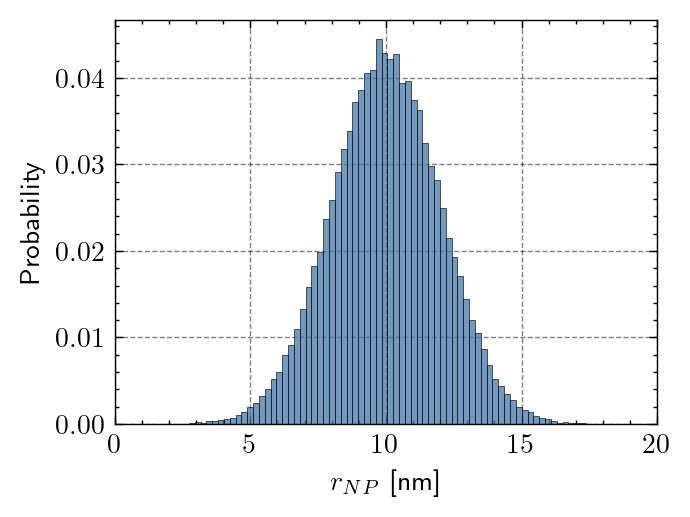

In [ ]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    ax  = sns.histplot(data=np.random.normal(10,2,100000), ax=ax, bins=80, stat='probability')
    ax.set_xlabel("$r_{NP}$ [nm]")
    ax.set_xlim(0,20)
    fig.savefig("plots/dist_cap.svg", transparent=True)

In [ ]:
N_voltages      = 201
N               = 10
voltages        = np.zeros((N_voltages,3))
voltages[:,0]   = np.linspace(-0.2,0.2,N_voltages)
data_cap        = {}

np_info = {
    "eps_r"         : 2.6,
    "eps_s"         : 3.9,
    "mean_radius"   : 10.0,
    "std_radius"    : 2.0,
    "np_distance"   : 1.0
}

for seed in range(10):

    topology    = return_string_topology(N)
    sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology, np_info=np_info, seed=seed)
    sim_class.run_const_voltages(voltages=voltages, target_electrode=1, output_potential=True, save_th=0.1)
    data_cap[seed] = sim_class.return_output_values()

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_16241/975516760.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.legend(fontsize='xx-small', ncol=3, title='$\mu_r = 10$, $\sigma_r = 2$, String of $10$ Nanoparticles', title_fontsize='x-small')


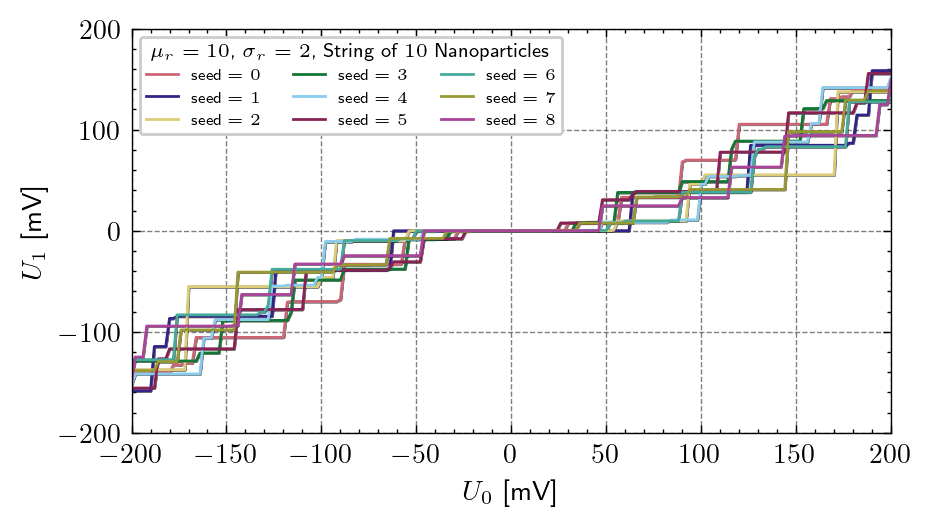

In [ ]:
cmap    = plt.get_cmap('Reds')
N_param = len(N_vals)

with plt.style.context(["science","muted", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot()

    for i, seed in enumerate(range(9)):

        values  = data_cap[seed][:,2]*1000
        error   = data_cap[seed][:,3]*1000

        ax.plot(voltages[:,0]*1000, values, label='seed $='+f' {seed}$')
        ax.fill_between(x=voltages[:,0]*1000, y1=values-error, y2=values+error, color='black', alpha=0.5)

    ax.set_xlim(-200,200)
    ax.set_ylim(-200,200)
    ax.legend(fontsize='xx-small', ncol=3, title='$\mu_r = 10$, $\sigma_r = 2$, String of $10$ Nanoparticles', title_fontsize='x-small')
    ax.set_xlabel("$U_{0}$ [mV]")
    ax.set_ylabel("$U_{1}$ [mV]")

    fig.savefig("plots/constant_string_cap.svg", transparent=True)

## at high Temperature

In [4]:
N_voltages      = 201
voltages        = np.zeros((N_voltages,3))
voltages[:,0]   = np.linspace(-0.2,0.2,N_voltages)
T_vals          = [0,2,4,8,16,32,64,128]
data_T          = {}
pot_T           = {}

for T in T_vals:

    topology    = return_string_topology(10)
    sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
    sim_class.run_const_voltages(voltages=voltages, target_electrode=1, output_potential=True, save_th=0.1, T_val=T)
    data_T[T]   = sim_class.return_output_values()
    pot_T[T]    = sim_class.return_potential_landscape()

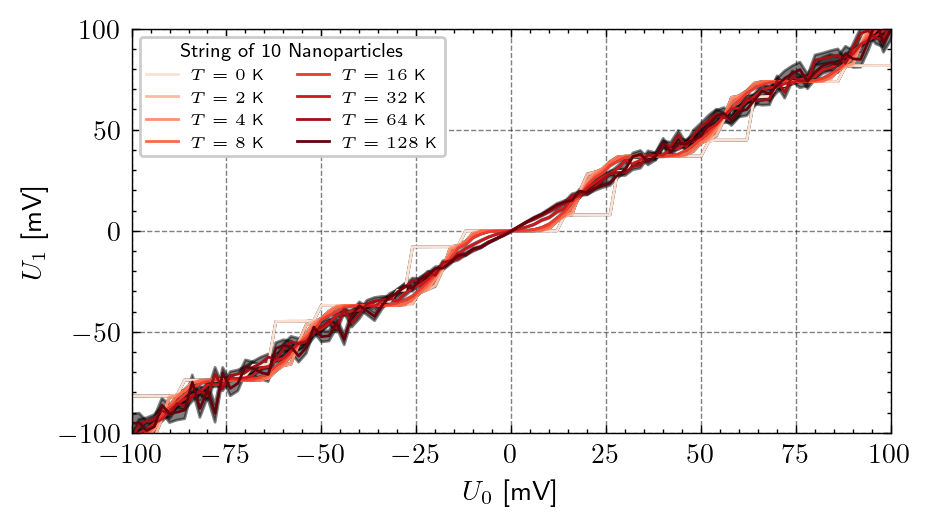

In [7]:
cmap    = plt.get_cmap('Reds')
N_param = len(T_vals)

with plt.style.context(["science","muted", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot()

    for i, T in enumerate(T_vals):

        values  = data_T[T][:,2]*1000
        error   = data_T[T][:,3]*1000

        ax.plot(voltages[:,0]*1000, values, c=cmap((i+1)/N_param), label=f'$T = {T}$ K')
        ax.fill_between(voltages[:,0]*1000, values-error, values+error, color='black', alpha=0.5)
    
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)
    ax.legend(fontsize='xx-small', ncol=2, title='String of 10 Nanoparticles', title_fontsize='x-small')
    ax.set_xlabel("$U_{0}$ [mV]")
    ax.set_ylabel("$U_{1}$ [mV]")

    fig.savefig("plots/constant_string_high_T.svg", transparent=True)


# Network of Nanoparticles

In [ ]:
N_voltages      = 201
voltages        = np.zeros((N_voltages,9))
voltages[:,0]   = np.linspace(-0.2,0.2,N_voltages)
data_net        = {}

for N in [3,5,7,9,11,13,15,17]:

    topology    = return_network_topology(N)
    sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
    sim_class.run_const_voltages(voltages=voltages, target_electrode=7, output_potential=True, save_th=0.1)
    data_net[N] = sim_class.return_output_values()

In [ ]:
cmap    = plt.get_cmap('Reds')
N_param = len([3,5,7,9,11,13,15,17])

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot()

    for i, N in enumerate([3,5,7,9,11,13,15,17]):

        values  = data_net[N][:,2]*1000
        error   = data_net[N][:,3]*1000

        ax.plot(voltages[:,0]*1000, values, color=cmap((i+1)/N_param), label='$N_{NP} ='+f' {N}$')
        ax.fill_between(x=voltages[:,0]*1000, y1=values-error, y2=values+error, color='black', alpha=0.5)

    ax.set_xlim(-200,200)
    ax.set_ylim(-3,3)
    ax.legend(fontsize='xx-small', ncol=2, title='$T = 0$ K, Network of $N_{NP}$ Nanoparticles', title_fontsize='x-small')
    ax.set_xlabel("$U_{Input}$ [mV]")
    ax.set_ylabel("$U_{Output}$ [mV]")

    fig.savefig("plots/constant_network_low_T.svg", transparent=True)

# Time dependent Simulations

### String of Nanoparticles

In [ ]:
amplitude       = 0.2
step_size       = 1e-10
steps_in_sweep  = 100
n_sweeps        = 13
N_electrodes    = 2
signal          = [np.linspace(-1*amplitude, amplitude, steps_in_sweep//2, endpoint=False) if (i % 2 == 0) else np.linspace(amplitude, -1*amplitude, steps_in_sweep//2, endpoint=False) for i in range(n_sweeps)]
signal          = [x for xs in signal for x in xs]
voltages        = np.zeros(shape=(n_sweeps*steps_in_sweep//2,N_electrodes+1))
voltages[:,0]   = signal
time            = step_size*np.arange(n_sweeps*steps_in_sweep//2)

In [ ]:
N           = 8
topology    = return_string_topology(N)
sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
sim_class.run_var_voltages(voltages=voltages, time_steps=time, target_electrode=1, output_potential=True, save=False, eq_steps=0, stat_size=500)
data_time   = sim_class.return_output_values()

In [ ]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot(2,1,1)

    values  = data_time[:,2]*1000
    error   = data_time[:,3]*1000

    ax.plot(time[1:]*1e9, values)
    ax.fill_between(x=time[1:]*1e9, y1=values-error, y2=values+error, color='black', alpha=0.5)
    ax.set_xticklabels("")
    ax.set_ylabel("$U_{Output}$ [mV]")

    ax  = fig.add_subplot(2,1,2)
    ax.plot(time[1:]*1e9, voltages[1:,0]*1000)

    # ax.set_xlim(-200,200)
    # ax.set_ylim(-3,3)
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$U_{Input}$ [mV]")

    fig.savefig("plots/string_time.svg", transparent=True)

In [ ]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot()

    values  = data_time[:,2]*1000
    error   = data_time[:,3]*1000

    ax.plot(voltages[1:,0]*1000, values)
    ax.fill_between(x=voltages[1:,0]*1000, y1=values-error, y2=values+error, color='black', alpha=0.5)

    ax.set_xlim(-200,200)
    # ax.set_ylim(-3,3)
    ax.set_xlabel("$U_{Input}$ [mV]")
    ax.set_ylabel("$U_{Output}$ [mV]")

    fig.savefig("plots/string_time_space.svg", transparent=True)

### Network of Nanoparticles

In [ ]:
amplitude       = 0.2
step_size       = 1e-10
steps_in_sweep  = 100
n_sweeps        = 21
N_electrodes    = 8
signal          = [np.linspace(-1*amplitude, amplitude, steps_in_sweep//2, endpoint=False) if (i % 2 == 0) else np.linspace(amplitude, -1*amplitude, steps_in_sweep//2, endpoint=False) for i in range(n_sweeps)]
signal          = [x for xs in signal for x in xs]
voltages        = np.zeros(shape=(n_sweeps*steps_in_sweep//2,N_electrodes+1))
voltages[:,0]   = signal
time            = step_size*np.arange(n_sweeps*steps_in_sweep//2)

In [ ]:
N           = 7
topology    = return_network_topology(N)
sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
sim_class.run_var_voltages(voltages=voltages, time_steps=time, target_electrode=7, output_potential=True, save=False, eq_steps=0, stat_size=500)
data_time   = sim_class.return_output_values()

In [ ]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot(2,1,1)

    values  = data_time[:,2]*1000
    error   = data_time[:,3]*1000

    ax.plot(time[1:]*1e9, values)
    ax.fill_between(x=time[1:]*1e9, y1=values-error, y2=values+error, color='black', alpha=0.5)
    ax.set_xticklabels("")
    ax.set_ylabel("$U_{Output}$ [mV]")

    ax  = fig.add_subplot(2,1,2)
    ax.plot(time[1:]*1e9, voltages[1:,0]*1000)

    # ax.set_xlim(-200,200)
    # ax.set_ylim(-3,3)
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$U_{Input}$ [mV]")

    fig.savefig("plots/network_time.svg", transparent=True)

In [ ]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot()

    values  = data_time[:,2]*1000
    error   = data_time[:,3]*1000

    ax.plot(voltages[1:,0]*1000, values)
    ax.fill_between(x=voltages[1:,0]*1000, y1=values-error, y2=values+error, color='black', alpha=0.5)

    ax.set_xlim(-200,200)
    # ax.set_ylim(-3,3)
    ax.set_xlabel("$U_{Input}$ [mV]")
    ax.set_ylabel("$U_{Output}$ [mV]")

    fig.savefig("plots/network_time_space.svg", transparent=True)

In [ ]:
min_val         = 0.1
max_val         = 0.2
step_size       = 1e-10
N_voltages      = 1000
delta_pos       = 200
N_electrodes    = 8

voltages                = np.zeros(shape=(N_voltages,N_electrodes+1)) + min_val
voltages[:,-1]          = 0
voltages[delta_pos,0]   = max_val
time                    = step_size*np.arange(N_voltages)

In [ ]:
N           = 7
topology    = return_network_topology(N)
sim_class   = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
sim_class.run_var_voltages(voltages=voltages, time_steps=time, target_electrode=7, output_potential=True, save=False, eq_steps=0, stat_size=500)
data_time   = sim_class.return_output_values()

In [ ]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    ax  = fig.add_subplot(2,1,1)

    values  = data_time[:,2]*1000
    error   = data_time[:,3]*1000

    ax.plot(time[1:]*1e9, values)
    ax.fill_between(x=time[1:]*1e9, y1=values-error, y2=values+error, color='black', alpha=0.5)
    ax.set_xticklabels("")
    ax.set_ylabel("$U_{Output}$ [mV]")

    ax  = fig.add_subplot(2,1,2)
    ax.plot(time[1:]*1e9, voltages[1:,0]*1000)

    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$U_{Input}$ [mV]")

    # fig.savefig("plots/network_time.svg", transparent=True)

---